# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [56]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score  
from sklearn.ensemble import RandomForestClassifier # BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler  ## to Normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

##from sklearn.metrics import accuracy_score
##from sklearn.linear_model import LogisticRegression
##from sklearn.naive_bayes import GaussianNB
##from sklearn.neighbors import KNeighborsClassifier
##from sklearn.tree import DecisionTreeClassifier
##from sklearn.ensemble import StackingClassifier


### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df=pd.read_csv('marketing.csv',encoding='unicode_escape')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
def missing_values(df):
    print("Missing Values Percentages\n",df.isnull().sum()/len(df)*100)

missing_values(df)

Missing Values Percentages
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


In [6]:
#df.fillna({'Income':0},inplace=True)
df['Income'].fillna(df['Income'].mean(),inplace=True)

In [7]:
missing_values(df)

Missing Values Percentages
 ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [8]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df=df.drop(columns=['Dt_Customer'])    

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,3,6,5,0,0,0,0,0,0,0


### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [11]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
df_copy=df.copy()

In [13]:
df['Marital_Status']=df['Marital_Status'].replace(['Married','Together'],'relationship')
df['Marital_Status']=df['Marital_Status'].replace(['Divorced','Widow','Alone','YOLO','Absurd'],'Single')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,relationship,71613.0,0,0,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,relationship,26646.0,1,0,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,relationship,58293.0,1,0,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [14]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [15]:
df['Total_Expenses']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [16]:
df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Expenses']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Expenses
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [17]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']

In [18]:
df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','Num_Total_Purchases']].head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,Num_Total_Purchases
0,8,10,4,3,25
1,1,1,2,2,6
2,8,2,10,1,21
3,2,0,4,2,8
4,5,3,6,5,19


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [19]:
df['Kids']=df['Kidhome']+df['Teenhome']
df[['Kidhome','Teenhome','Kids']].head()

,Kidhome,Teenhome,Kids
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [20]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','TotalAcceptedCmp']].head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,TotalAcceptedCmp
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


### 11. Drop those columns which we have used above for obtaining new features

In [21]:
df=df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])
df=df.drop(columns=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'])
df=df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,58,7,0,1617,25,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,5,0,27,6,2,0
2,4141,1965,Graduation,relationship,71613.0,0,0,26,4,0,776,21,0,0
3,6182,1984,Graduation,relationship,26646.0,1,0,26,6,0,53,8,1,0
4,5324,1981,PhD,relationship,58293.0,1,0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [22]:
from datetime import date

df['Age']=date.today().year - df['Year_Birth']
df[['Year_Birth','Age']].head()

,Year_Birth,Age
0,1957,65
1,1954,68
2,1965,57
3,1984,38
4,1981,41


In [23]:
df=df.drop(columns=['Year_Birth'])

### 13. Encode the categorical variables in the dataset

In [24]:
#Label Encoding

category = ['Education','Marital_Status']

lbl_encode=LabelEncoder()

for i in category:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

### 14. Standardize the columns, so that values are in a particular range

In [25]:
df1=df.copy()

scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, df1.index, df1.columns)

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [26]:
#step1 - Calculate Co-varience Matrix
cov_matrix=np.cov(scaled_features_df.T)
cov_matrix

array([[ 1.00044663e+00, -3.84114609e-03,  1.89383575e-02,
         1.30418192e-02,  2.40668086e-03, -2.58104310e-03,
        -4.65448809e-02, -7.44950801e-03,  3.38981712e-02,
        -1.80618275e-02, -2.38449472e-02, -1.45948170e-04,
        -3.69007040e-02, -2.76368349e-05],
       [-3.84114609e-03,  1.00044663e+00, -1.37540339e-02,
         1.20027297e-01, -4.55846687e-02,  1.18537895e-01,
        -1.17336854e-02, -4.02988173e-02, -5.05625191e-02,
         9.20951775e-02,  9.40543885e-02,  5.32130438e-02,
         6.32789156e-02,  1.71466853e-01],
       [ 1.89383575e-02, -1.37540339e-02,  1.00044663e+00,
         4.63846975e-03,  2.35428172e-02,  3.08099703e-02,
        -4.50971948e-03,  3.44176238e-03, -5.20465543e-03,
        -1.77523234e-02,  6.71036864e-03,  3.91759832e-02,
        -6.00420555e-02, -4.23840181e-03],
       [ 1.30418192e-02,  1.20027297e-01,  4.63846975e-03,
         1.00044663e+00, -4.25365904e-01,  1.90265728e-02,
        -3.94826239e-03, -5.50069657e-01, -2.

In [27]:
#Setp 2 - Calculate the Eigen Values and Eigen Vectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print("eig values:\n",eig_values)
print("\n")
print("eig vectors:\n",eig_vectors)

eig values:
 [ 3.72834059e+00  1.85113645e+00  1.58621915e-01  3.38333984e-01
  5.04520799e-01  6.66427159e-01  7.61032742e-01  9.11054582e-01
  9.22772490e-01  1.09590369e+00  1.05795024e+00  9.93240975e-01
  1.01691717e+00 -7.73534930e-16]


eig vectors:
 [[ 7.45009135e-03 -5.95563600e-03 -5.04878419e-03 -2.77896007e-02
   6.25867702e-03 -5.78897990e-04 -1.49868963e-01 -2.21987147e-01
   5.29702732e-01  1.82346756e-01 -7.16220688e-01 -3.17053832e-01
   1.49600464e-03  5.65213678e-18]
 [-5.79338135e-02  2.61309443e-01 -1.13023839e-02 -2.87167372e-02
   6.91184912e-02  2.23247256e-01  1.62840751e-01  7.05768581e-01
   2.90323323e-01 -3.34683391e-01  4.36801280e-02 -3.80199577e-01
  -7.35205742e-02 -5.98531921e-20]
 [ 1.73598130e-02  4.35622030e-02  8.69482018e-04 -3.62708084e-03
   3.20764006e-02 -4.88060503e-02 -1.57823088e-01  3.66093204e-01
  -3.87660560e-02  2.68980607e-01 -2.44520537e-01  4.57886086e-01
  -7.01527218e-01 -1.23937688e-16]
 [-3.93585679e-01  1.70636526e-01 -1.036671

In [28]:
#Step 3

print(sum(eig_values),"\n")

var_exp = [ (i/sum(eig_values))*100 for i in sorted(eig_values, reverse=True) ]
cum_var_exp = np.cumsum(var_exp)
                   
print("Explained Variance : ",var_exp)
print("\n")
print("Cumulative Variance Explained : ",cum_var_exp)

14.006252791424737 

Explained Variance :  [26.61911540077117, 13.216500336331338, 7.82438893614353, 7.553413841088625, 7.260451375734266, 7.091411171882029, 6.588289553766035, 6.50462758328524, 5.433521398067763, 4.758068903254622, 3.6021111866671784, 2.415592440665509, 1.132507872342677, -5.522782871937629e-15]


Cumulative Variance Explained :  [ 26.6191154   39.83561574  47.66000467  55.21341851  62.47386989
  69.56528106  76.15357062  82.6581982   88.0917196   92.8497885
  96.45189969  98.86749213 100.         100.        ]


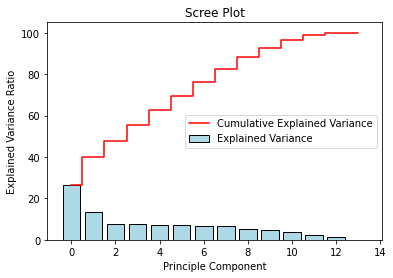

In [29]:
#Scree Plot
plt.bar(range(14),var_exp,align="center",color="lightblue",edgecolor="black",label="Explained Variance")
plt.step(range(14),cum_var_exp,where="mid",color="red",label="Cumulative Explained Variance")
plt.xlabel("Principle Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [30]:
#scikit learn Principal Compound Analysis method

#%%time()

pca=PCA(n_components=10)
pca_df=pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.248045,-0.418658,-0.366605,-0.548572,1.149918,-0.404393,0.006336,-0.567868,-1.363091,-0.590383
1,-1.926319,1.256597,-0.393474,-0.834771,0.952717,-0.584401,-1.110050,-0.508378,0.660576,1.326821
2,1.691432,-0.696521,0.504004,0.295336,-0.742887,0.027013,-1.194235,0.243176,0.235392,-0.269922
3,-1.858228,-1.681812,-0.186115,0.672188,-0.786567,0.267879,-0.165850,0.206931,0.523161,-0.085521
4,-0.278698,-0.418396,0.331162,-0.901136,-0.781005,0.266920,1.878911,1.277282,0.873563,-0.473061


In [31]:
pca.explained_variance_ratio_

array([0.26619115, 0.132165  , 0.07824389, 0.07553414, 0.07260451,
       0.07091411, 0.0658829 , 0.06504628, 0.05433521, 0.04758069])

In [32]:
pd.Series(pca.explained_variance_ratio_).cumsum()

0    0.266191
1    0.398356
2    0.476600
3    0.552134
4    0.624739
5    0.695653
6    0.761536
7    0.826582
8    0.880917
9    0.928498
dtype: float64

In [33]:
#Finding optima K values by KMeans clustering using Elbow Plot
cluster_errors=[]
cluster_range=range(2,15)
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [34]:
#Creating DataFrame with number of clusters and cluster errors
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

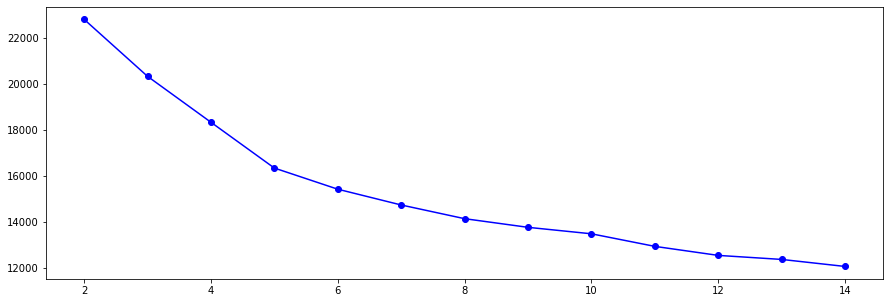

In [35]:
##Elbow Plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [36]:
#Applying KMeans clustering for the optimal number of clusters obtained above
kmeans=KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [37]:
#Creating a DataFrame of the Labels
label=pd.DataFrame(kmeans.labels_,columns=['Label'])
df['label'] = label
df['label'].unique()

array([2, 1, 0])

In [38]:
df['label'].value_counts(normalize=True)*100

1    42.098214
0    33.660714
2    24.241071
Name: label, dtype: float64

In [43]:
df[df['label'] == 0]['Income'].mean()

58613.51990826304

In [44]:
df[df['label'] == 1]['Income'].mean()

33240.393969817495

In [45]:
df[df['label'] == 2]['Income'].mean()

76415.39135934209

In [47]:
#Joining the label dataframe to the pca_df
kmeans_df=pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Label
0,2.248045,-0.418658,-0.366605,-0.548572,1.149918,-0.404393,0.006336,-0.567868,-1.363091,-0.590383,2
1,-1.926319,1.256597,-0.393474,-0.834771,0.952717,-0.584401,-1.110050,-0.508378,0.660576,1.326821,1
2,1.691432,-0.696521,0.504004,0.295336,-0.742887,0.027013,-1.194235,0.243176,0.235392,-0.269922,2
3,-1.858228,-1.681812,-0.186115,0.672188,-0.786567,0.267879,-0.165850,0.206931,0.523161,-0.085521,1
4,-0.278698,-0.418396,0.331162,-0.901136,-0.781005,0.266920,1.878911,1.277282,0.873563,-0.473061,1


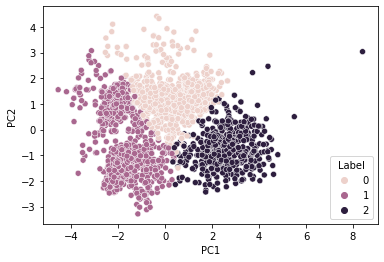

In [48]:
#Visualising the clusters formed
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

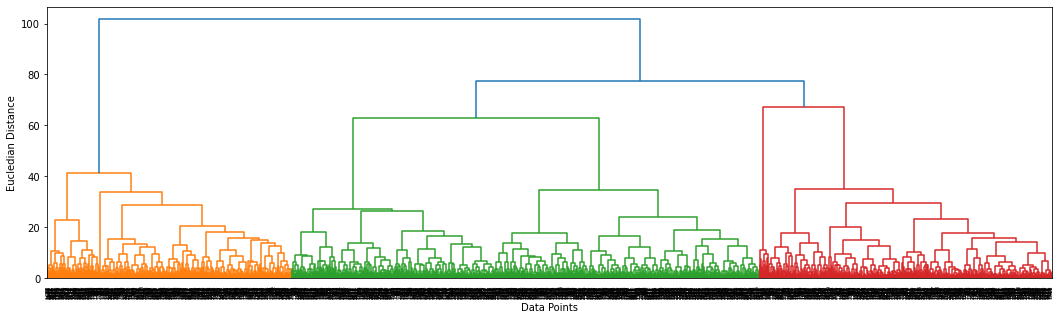

In [51]:
plt.figure(figsize=[18,5])
merg=linkage(scaled_features,method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Data Points')
plt.ylabel('Eucledian Distance')
plt.show()

In [57]:
for i in range(2,15):
    heir=AgglomerativeClustering(n_clusters=i)
    heir=heir.fit(scaled_features_df)
    labels=heir.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,labels))

2 0.19662612709825456
3 0.16150219361061827
4 0.166479235190174
5 0.1623932905362498
6 0.16414531933251708
7 0.15810498575422
8 0.14128081384136643
9 0.14299741720965103
10 0.1276831581323829
11 0.12579531726709223
12 0.13048823703594184
13 0.1333362272064847
14 0.12087511268653167


In [59]:
#Building hierarchial clustering model using the optimal clusters as using the original data
hie_cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df)

In [60]:
#Creating a Dataframe of the labels
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,2
2,1
3,0
4,0


In [62]:
#Joining the label dataframe with unscaled initial cleaned dataframe
df_hier=df.join(df_label1)
df_hier.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,label,Labels
0,5524,2,0,58138.0,0,0,58,7,0,1617,25,0,1,65,2,1
1,2174,2,0,46344.0,1,1,38,5,0,27,6,2,0,68,1,2
2,4141,2,1,71613.0,0,0,26,4,0,776,21,0,0,57,2,1
3,6182,2,1,26646.0,1,0,26,6,0,53,8,1,0,38,1,0
4,5324,4,1,58293.0,1,0,94,5,0,422,19,1,0,41,1,0


### Visualization and Interpretation of results

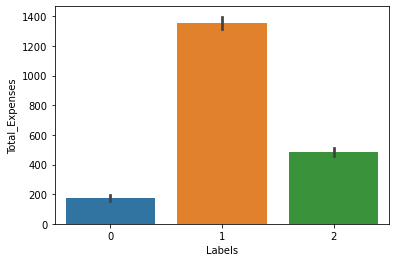

In [65]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

In [ ]:
# Total_Expenses is much higher for Labels 1

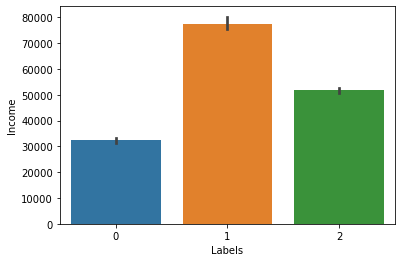

In [66]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

In [ ]:
#Income is also high for Labels 1

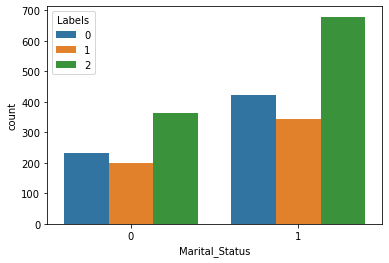

In [68]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()

In [ ]:
#Most of the customers are in relationship is in cluster 0

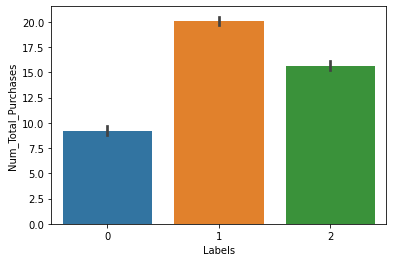

In [69]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

In [ ]:
#Total Purchases is high for cluster 1

-----
## Happy Learning
-----